<a href="https://colab.research.google.com/github/ViniViniAntunes/Analise-descritiva-PNAD-2015/blob/master/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# CURSO DE ESTATÍSTICA - PARTE 1
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# DATASET DO PROJETO
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

***
#### Observação
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### Sugestões: pandas, numpy, seaborn

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv', sep = ',')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### Descreva os pontos mais relevantes que você observa na tabela e no gráfico.

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [
           dados.Renda.min(),
            2 * 788,
            5 * 788,
            15 * 788,
            25 * 788,
            dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
freq = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
freq

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
dist_freq = pd.DataFrame(
    {'Frequência': freq, 'Porcentagem (%)': percentual}
)
dist_freq.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

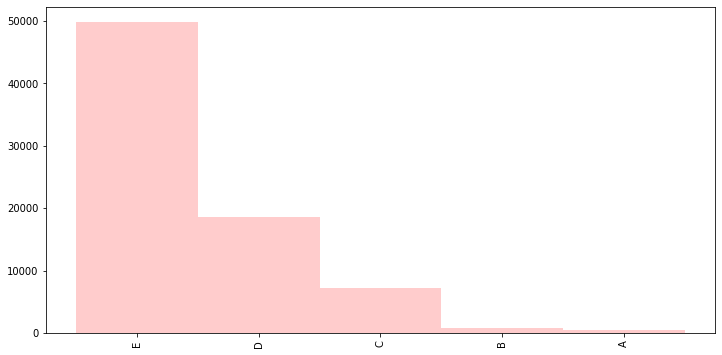

In [9]:
graf_renda_por_classe = dist_freq['Frequência'].plot.bar(width= 1, color = 'red', alpha = 0.2, figsize=(12, 6))
graf_renda_por_classe

> ### Conclusões

Nota-se aqui que a grande maioria ganha pouco enquanto poucos ganham muito. Podemos ver, através desse gráfico a má distribuição de renda do país.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)

In [10]:
medidas_tendencia_central_idade = {'media_idade': dados.Idade.mean(), 'mediana_idade': dados.Idade.median(),  'moda_idade': dados.Idade.mode()}
medidas_tendencia_central_idade

{'media_idade': 44.07142113482561, 'mediana_idade': 43.0, 'moda_idade': 0    40
 dtype: int64}

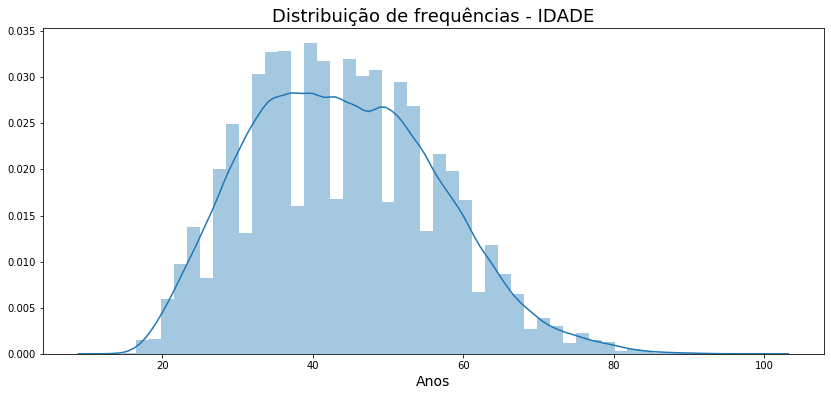

In [11]:
graf_idade = sns.distplot(dados['Idade'])
graf_idade.figure.set_size_inches(14, 6)
graf_idade.set_title('Distribuição de frequências - IDADE', fontsize = 18)
graf_idade.set_xlabel('Anos', fontsize = 14)
graf_idade

In [12]:
medidas_tendencia_central_estudo = {'media_estudo': dados['Anos de Estudo'].mean(), 'mediana_estudo': dados['Anos de Estudo'].median(),  'moda_estudo': dados['Anos de Estudo'].mode()}
medidas_tendencia_central_estudo

{'media_estudo': 9.469664237376367,
 'mediana_estudo': 11.0,
 'moda_estudo': 0    12
 dtype: int64}

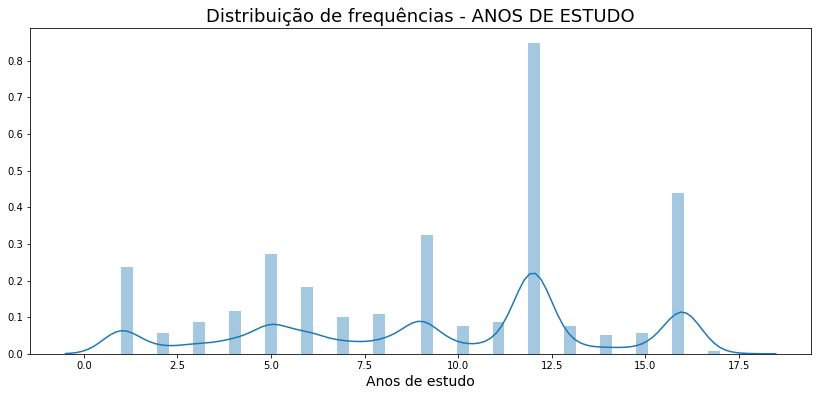

In [13]:
graf_estudo = sns.distplot(dados['Anos de Estudo'])
graf_estudo.figure.set_size_inches(14, 6)
graf_estudo.set_title('Distribuição de frequências - ANOS DE ESTUDO', fontsize = 18)
graf_estudo.set_xlabel('Anos de estudo', fontsize = 14)
graf_estudo

In [14]:
medidas_tendencia_central_renda = {'media_renda': dados['Renda'].mean(), 'mediana_renda': dados['Renda'].median(),  'moda_renda': dados['Renda'].mode()}
medidas_tendencia_central_renda

{'media_renda': 2000.3831988547631,
 'mediana_renda': 1200.0,
 'moda_renda': 0    788
 dtype: int64}

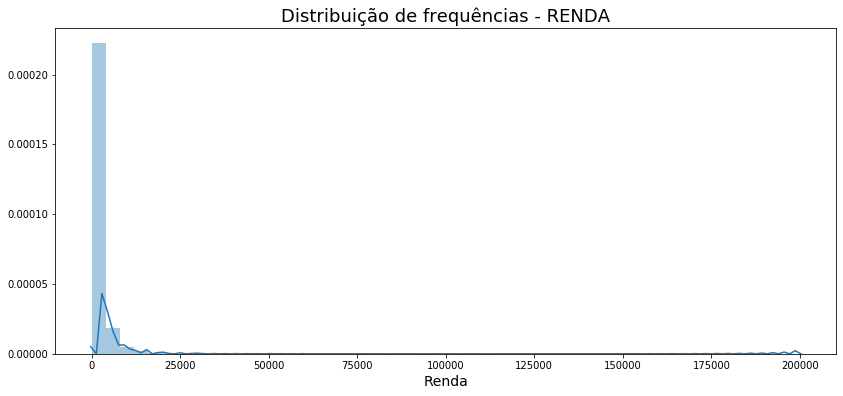

In [15]:
graf_renda = sns.distplot(dados.Renda)
graf_renda.figure.set_size_inches(14, 6)
graf_renda.set_title('Distribuição de frequências - RENDA', fontsize = 18)
graf_renda.set_xlabel('Renda', fontsize = 14)
graf_renda

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

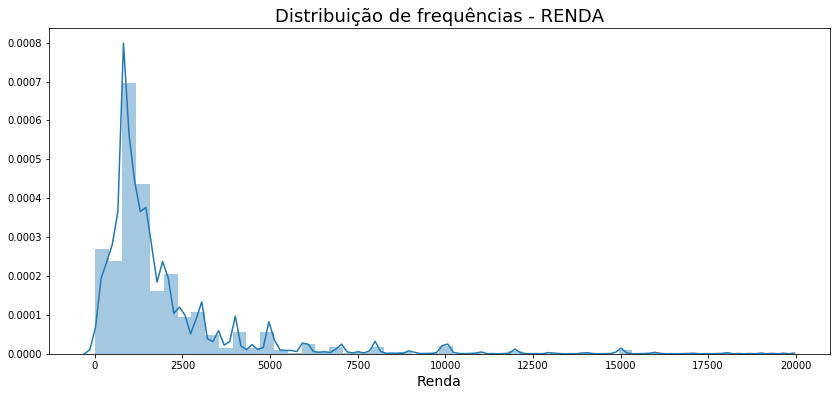

In [16]:
graf_renda_abaixo_20mil = sns.distplot(dados.query('Renda < 20000').Renda)
graf_renda_abaixo_20mil.figure.set_size_inches(14, 6)
graf_renda_abaixo_20mil.set_title('Distribuição de frequências - RENDA', fontsize = 18)
graf_renda_abaixo_20mil.set_xlabel('Renda', fontsize = 14)
graf_renda_abaixo_20mil

In [17]:
medidas_tendencia_central_altura = {'media_altura': dados['Altura'].mean(), 'mediana_altura': dados['Altura'].median(),  'moda_altura': dados['Altura'].mode()}
medidas_tendencia_central_altura

{'media_altura': 1.6995124540575814,
 'mediana_altura': 1.6993247325,
 'moda_altura': 0    1.568128
 1    1.671225
 2    1.681659
 3    1.692977
 4    1.708163
 5    1.708370
 6    1.753842
 7    1.779073
 8    1.796462
 dtype: float64}

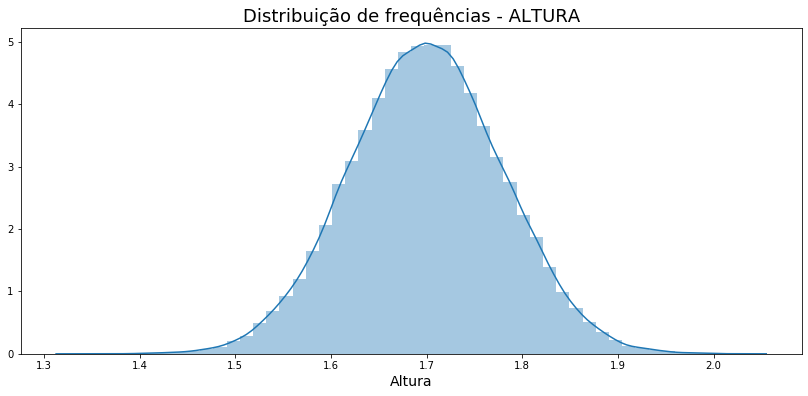

In [18]:
graf_altura = sns.distplot(dados.Altura)
graf_altura.figure.set_size_inches(14, 6)
graf_altura.set_title('Distribuição de frequências - ALTURA', fontsize = 18)
graf_altura.set_xlabel('Altura', fontsize = 14)
graf_altura

> ### Conclusões

Os histogramas das variáveis quantitativas do nosso dataset (Idade, Anos de estudo, Renda e Altura) são, respectivamente, assimétrico à direita, assimétrico à esquerda, assimétrico à direita e simétrico.

Podemos notar que o histograma da renda tem a uma assimetria muito extrema à direita. Provavelmente, devido a candidatos à outliers. Porém, mesmo considerando indivíduos com renda abaixo de R$20.000,00, ainda podemos notar a forte assimetria à direita, o que enfatiza a má distribuição de renda no país já observada anteriormente em 'graf_renda_por_classe'.

Um outro detalhe que podemos perceber é, que na distribuição de idade, existem alguns picos e vales no meio da distribuição. Isso pode ser devido às idades cujo número não são redondos (idades diferentes de 20, 30, 40...). Por exemplo, as pessoas com 41 anos, dizem ter 40 numa forma de 'facilitar' na momento da pesquisa.

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### Avalie o resultado da tabela e escreva suas principais conclusões
#### Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto

In [0]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Abaixo de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [20]:
freq_sexo_por_cor = pd.crosstab(dados.Sexo, dados.Cor)
freq_sexo_por_cor.rename(index = sexo, columns = cor, inplace = True)
freq_sexo_por_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [21]:
percent_sexo_por_cor = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percent_sexo_por_cor.rename(index = sexo, columns = cor, inplace = True)
percent_sexo_por_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Aqui nota-se a desigualdade de gênero. Seja qual for a declaração da cor, mulheres continuam ganhando menos que os homens. Lembrando que essa pesquisa responderam apenas as pessoas que são as responsáveis pela casa. Mas isso não parece que mudaria esse quadro de desigualdade.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [22]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [23]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [24]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [25]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [26]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [27]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### Destaque os pontos mais importante que você observa nas tabulações
#### O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i>

In [28]:
renda_por_sexo_e_cor_medidas_tendencia_central = pd.crosstab(dados.Cor, dados.Sexo, values = dados.Renda, aggfunc = {'mean', 'median', 'max'})
renda_por_sexo_e_cor_medidas_tendencia_central.rename(index = cor, columns = sexo, inplace = True)
renda_por_sexo_e_cor_medidas_tendencia_central

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Mais uma vez podemos ver aqui a desigualdade de gênero. Nota-se também a assimetria à direita na distribuição de renda. Porém, agora não de maneira gráfica, o que torna a visualização um pouco mais impícita. Para notá-la, basta comparar as médias e as medianas. Médias maiores que a medianas, são sinais de assimetria à direita.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### Destaque os pontos mais importante que você observa nas tabulações
#### O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i>

In [29]:
renda_por_sexo_e_cor_medidas_de_dispersao = pd.crosstab(dados.Cor, dados.Sexo, values = dados.Renda, aggfunc = {'mad', 'var', 'std'})
renda_por_sexo_e_cor_medidas_de_dispersao.rename(index = cor, columns = sexo, inplace = True)
renda_por_sexo_e_cor_medidas_de_dispersao

mad               ...           var              
Sexo        Masculino     Feminino  ...     Masculino      Feminino
Cor                                 ...                            
Indígena   798.910889  3007.892952  ...  1.449841e+06  1.429818e+08
Branca    2261.012346  1670.967106  ...  2.257002e+07  1.056909e+07
Preta      975.602482   705.453357  ...  3.749294e+06  1.821960e+06
Amarela   3709.597211  2549.146322  ...  3.295707e+07  1.392166e+07
Parda     1125.827704   811.580946  ...  5.345747e+06  2.547960e+06

[5 rows x 6 columns]

> ### Conclusões

Analisando os desvios padrão das mulheres notamos que apresentam valores menores que oo dos homens. Isso indica que há uma maior constância nos valores de renda, que são vaores mais próximos da média. Somado ao fato de que a média de renda das mulheres são menores que as dos homens, corrobora mais uma vez que a desigualdade slarial quanto ao gênero existe.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.
#### 1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000
#### 2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

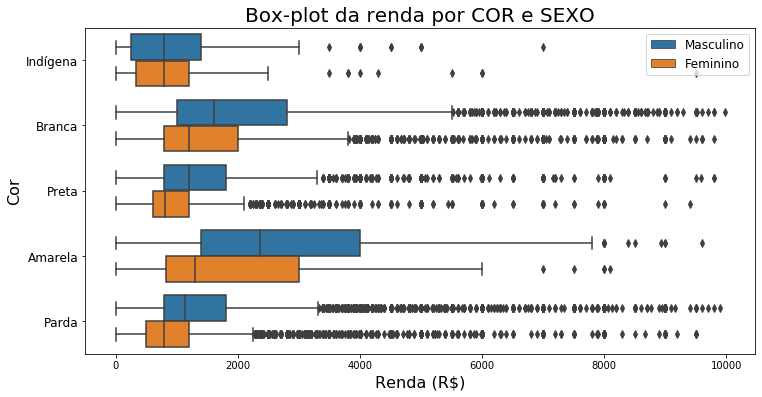

In [30]:
box_plot_renda_por_sexo_e_cor = sns.boxplot(
     x = 'Renda', y = 'Cor',
     hue = 'Sexo', 
     data = dados.query('Renda < 10000'), 
     orient = 'h')

# Ajustando o tamanho da imagem
box_plot_renda_por_sexo_e_cor.figure.set_size_inches(12, 6)

# Definindo o título do gráfico
box_plot_renda_por_sexo_e_cor.set_title('Box-plot da renda por COR e SEXO', 
                                        fontsize = 20)

# Configurando o eixo x
box_plot_renda_por_sexo_e_cor.set_xlabel('Renda (R$)', fontsize = 16)

# Configurando o eixo y
box_plot_renda_por_sexo_e_cor.set_ylabel('Cor', fontsize = 16, )
'''box_plot_renda_por_sexo_e_cor.set_yticklabels(
    ['Índígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], 
    fontsize = 12)'''
box_plot_renda_por_sexo_e_cor.set_yticklabels(
    [valor for valor in cor.values()], 
    fontsize = 12)

# Configurando legenda do gráfico (Sexo)
legenda, _ = box_plot_renda_por_sexo_e_cor.get_legend_handles_labels()
box_plot_renda_por_sexo_e_cor.legend(legenda, 
                                     [valor for valor in sexo.values()], 
                                     fontsize = 12)

# Plotar o gráfico
box_plot_renda_por_sexo_e_cor

> ### Conclusões

Primeiramente, vale lembrar que os valores de renda acima de R$10.000,00 foram desconsiderados para a construção desse gráfico com o intuito de melhorar a visualização. Como existem rendas muito superiores, esses causam uma forte assimetria à direita, deixando inviável a compreenssão do gráfico.

Sendo assim, nota-se mais uma vez a desigualdede de gênero em todas as descrições de cor. E podemos ver também que as pessoas que se declararam da cor amarela e branca são as que tem as maiores rendas.

# DESAFIO
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.

#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [31]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{:.2f}% da nossa amostra tem renda de até R$788,00 "
 "(salário mínimo em 2015)".format(percentual))

28.87% da nossa amostra tem renda de até R$788,00 (salário mínimo em 2015)


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.

In [32]:
quantil_99 = dados.Renda.quantile(q = 0.99)
print("99% da nossa amostra ganham até R${:.2f}".format(quantil_99))

99% da nossa amostra ganham até R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### Destaque os pontos mais importante que você observa nas tabulações
#### O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i>

In [33]:
renda_por_estudo_e_sexo = pd.crosstab(
                                      dados['Anos de Estudo'],
                                      dados.Sexo,
                                      values = dados.Renda,
                                      aggfunc = {
                                           'mean',
                                           'median',
                                           'max',
                                           'std'}).round(2)
renda_por_estudo_e_sexo.rename(
                               index = anos_de_estudo,
                               columns = sexo,
                               inplace = True)
renda_por_estudo_e_sexo

max                mean  ...   median       std         
Sexo             Masculino  Feminino Masculino  ... Feminino Masculino Feminino
Anos de Estudo                                  ...                            
Abaixo de 1 ano    30000.0   10000.0    799.49  ...    390.0   1023.90   639.31
1 ano              30000.0    2000.0    895.63  ...    400.0   1331.95   425.29
2 anos             40000.0    4000.0    931.18  ...    450.0   1435.17   498.23
3 anos             80000.0    3500.0   1109.20  ...    500.0   2143.80   424.12
4 anos             50000.0   10000.0   1302.33  ...    788.0   1419.82   629.55
5 anos             35000.0    8000.0   1338.65  ...    788.0   1484.65   635.78
6 anos             25000.0    6000.0   1448.88  ...    788.0   1476.63   574.55
7 anos             40000.0    9000.0   1465.50  ...    788.0   1419.71   602.04
8 anos             30000.0   18000.0   1639.40  ...    800.0   1515.58   896.78
9 anos             60000.0   20000.0   1508.04  ...    788.0   2137.66   973.22
10 anos            45000.0    6000.0   1731.27  ...    800.0   2078.61   620.61
11 anos           200000.0  100000.0   2117.06  ...   1000.0   2676.54  1819.04
12 anos            30000.0  120000.0   2470.33  ...   1200.0   2268.08  4851.83
13 anos            25000.0   20000.0   3195.10  ...   1300.0   2797.12  2053.79
14 anos            50000.0   20000.0   3706.62  ...   1600.0   3987.21  2064.08
15 anos ou mais   200000.0  100000.0   6134.28  ...   2800.0   7447.61  4212.77
Não determinados    7000.0    3000.0   1295.76  ...    788.0    979.65   459.99

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.
#### 1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000
#### 2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i>
#### 3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

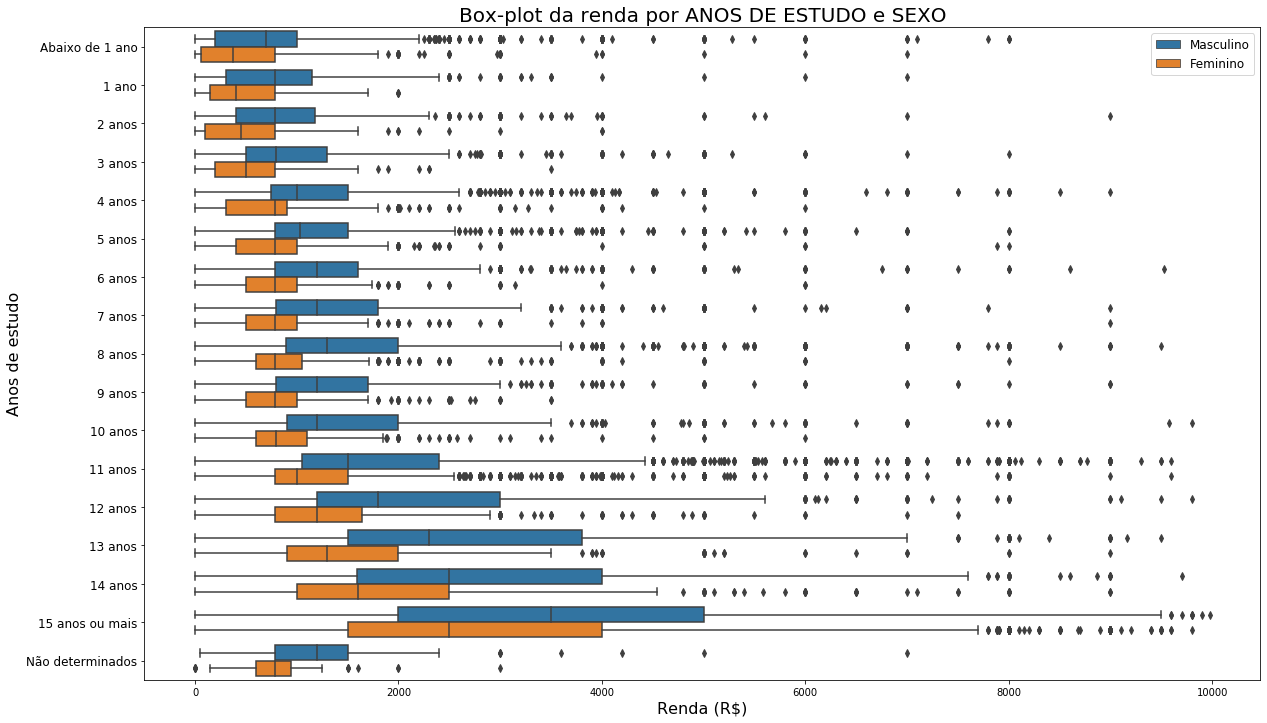

In [34]:
# box_plot_renda_por_estudo_e_cor = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')
box_plot_renda_por_estudo_e_cor = sns.boxplot(
     x = 'Renda',
     y = 'Anos de Estudo',
     hue = 'Sexo', 
     data = dados.query('Renda < 10000'), 
     orient = 'h')

# Ajustando o tamanho da imagem
box_plot_renda_por_estudo_e_cor.figure.set_size_inches(20, 12)

# Definindo o título do gráfico
box_plot_renda_por_estudo_e_cor.set_title(
    'Box-plot da renda por ANOS DE ESTUDO e SEXO',
     fontsize = 20)

# Configurando o eixo x
box_plot_renda_por_estudo_e_cor.set_xlabel('Renda (R$)', fontsize = 16)


# Configurando o eixo y
box_plot_renda_por_estudo_e_cor.set_ylabel('Anos de estudo', fontsize = 16, )
box_plot_renda_por_estudo_e_cor.set_yticklabels(
   [valor for valor in anos_de_estudo.values()],
   fontsize = 12)

# Configurando legenda do gráfico (Sexo)
legenda, _ = box_plot_renda_por_estudo_e_cor.get_legend_handles_labels()
box_plot_renda_por_estudo_e_cor.legend(legenda,
                                       [valor for valor in sexo.values()],
                                       fontsize = 12)

# Plotar o gráfico
box_plot_renda_por_estudo_e_cor

> ### Conclusões

Nesse gráfico, não há dúvidas quanto a desigualdade de gênero. Mesmo com mais anos de estudo, as mulheres recebem menos que os homens.

É possível perceber também que, quanto mais anos de estudo, maior é a renda. Como era o esperado.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### Destaque os pontos mais importante que você observa nas tabulações
#### Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para construir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i>

In [35]:
renda_por_UF = dados.groupby(['UF']).agg(
    {'Renda': ['mean', 'median', 'max', 'std']})
renda_por_UF.rename(index = uf, inplace = True)

renda_por_UF

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.
#### 1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000

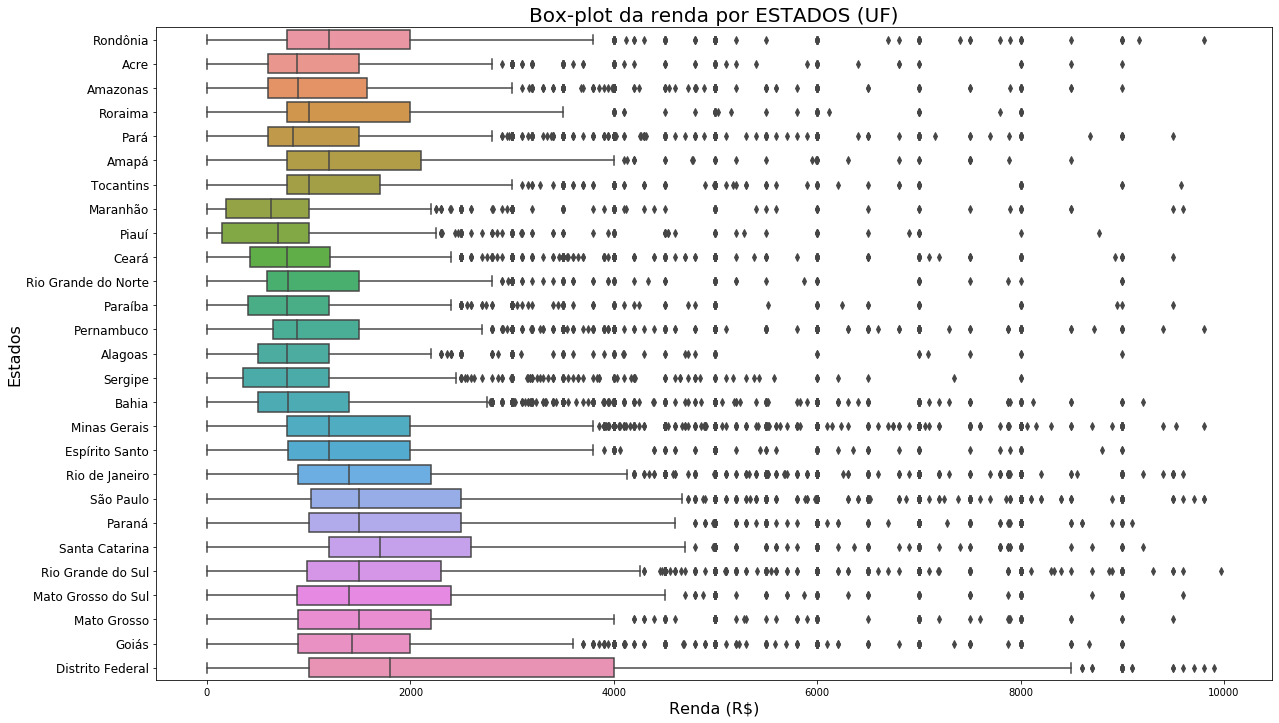

In [36]:
# Selecionando os dados
box_plot_renda_por_UF = sns.boxplot(
     x = 'Renda',
     y = 'UF',
     #hue = 'Sexo',
     data = dados.query('Renda < 10000'), 
     orient = 'h')

# Ajustando o tamanho da imagem
box_plot_renda_por_UF.figure.set_size_inches(20, 12)

# Definindo o título do gráfico
box_plot_renda_por_UF.set_title(
    'Box-plot da renda por ESTADOS (UF)',
     fontsize = 20)

# Configurando o eixo x
box_plot_renda_por_UF.set_xlabel('Renda (R$)', fontsize = 16)


# Configurando o eixo y
box_plot_renda_por_UF.set_ylabel('Estados', fontsize = 16, )
box_plot_renda_por_UF.set_yticklabels(
   [valor for valor in uf.values()],
   fontsize = 12)


'''# Experimente novamente comentando essa parte apenas como teste
box_plot_renda_por_UF.set_yticklabels(
   [valor for valor in uf.values()],
   fontsize = 12)'''

'''# Configurando legenda do gráfico (Sexo)
legenda, _ = box_plot_renda_por_UF.get_legend_handles_labels()
box_plot_renda_por_UF.legend(legenda,
                             [valor for valor in sexo.values()],
                              fontsize = 12)'''

# Plotar o gráfico
box_plot_renda_por_UF

### Aqui eu me desafiei a plotar o mesmo gráfico anterior, mas em ordem crescente das medianas das rendas

In [0]:
# Obtendo a lista dos estados ordenados pela mediana da renda
mediana_estados = dados.query('Renda < 10000').groupby('UF')['Renda'].median()
mediana_estados_ordenado = list(mediana_estados.sort_values().index)

In [0]:
# Obtendo uma lista com os nomes dos estados ordenados pela mendiana da renda
# Tive que criar esta lista para poder ordenar os labels junto aos box-plots
nomes_uf_ordenados_por_mediana = []
for nome in mediana_estados_ordenado:
  nomes_uf_ordenados_por_mediana.append(uf[nome])

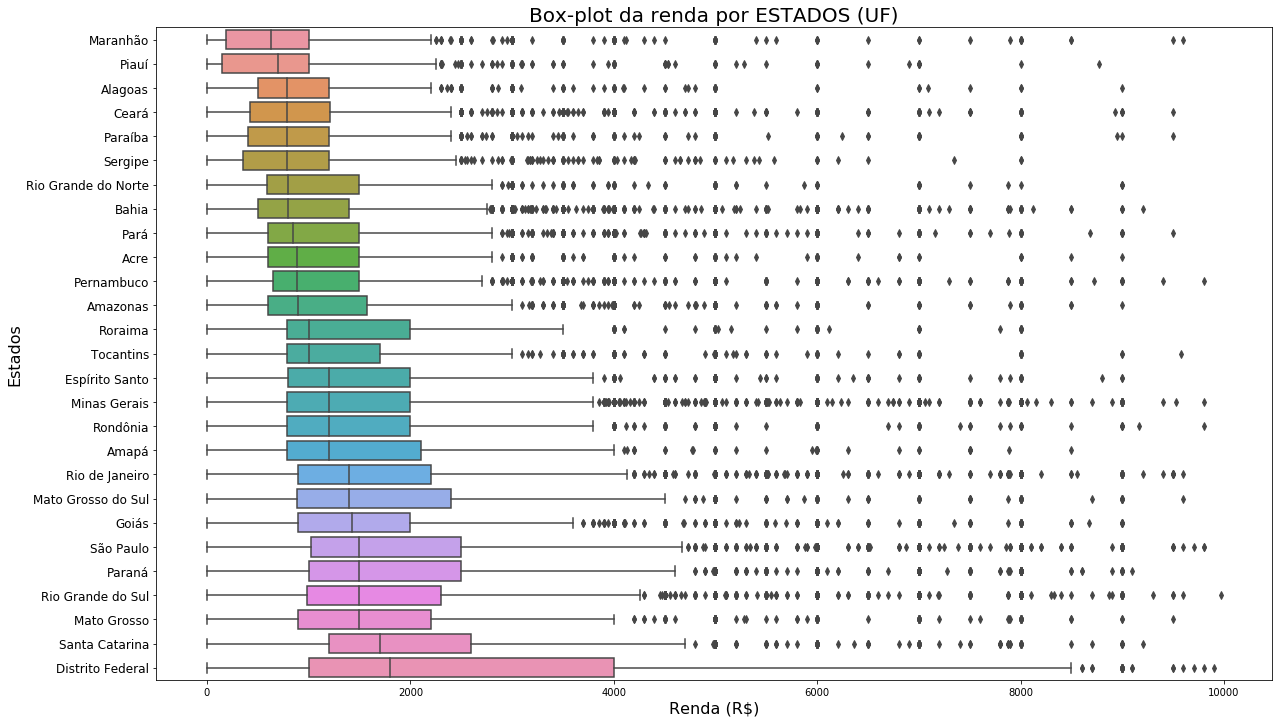

In [66]:
# Selecionando os dados
box_plot_renda_por_UF = sns.boxplot(
     x = 'Renda',
     y = 'UF',
     #hue = 'Sexo',
     data = dados.query('Renda < 10000'), 
     orient = 'h',
     order = mediana_estados_ordenado)

# Ajustando o tamanho da imagem
box_plot_renda_por_UF.figure.set_size_inches(20, 12)

# Definindo o título do gráfico
box_plot_renda_por_UF.set_title(
    'Box-plot da renda por ESTADOS (UF)',
     fontsize = 20)

# Configurando o eixo x
box_plot_renda_por_UF.set_xlabel('Renda (R$)', fontsize = 16)


# Configurando o eixo y
box_plot_renda_por_UF.set_ylabel('Estados', fontsize = 16, )
box_plot_renda_por_UF.set_yticklabels(
   nomes_uf_ordenados_por_mediana,
   fontsize = 12)

# Plotar o gráfico
box_plot_renda_por_UF

### E aqui o desafio foi plotar o mesmo gráfico, mas agora em oredem alfabética dos estados

In [0]:
# Obtendo a lista dos nome dos estados em ordem alfabética
nomes_uf_ordem_alfabetica = list(uf.values())
nomes_uf_ordem_alfabetica.sort()
nomes_uf_ordem_alfabetica

In [0]:
#Obtenedo uma lista com os códigos dos estados na mesma oredem alfabética do nomes do estados
lista = list(uf.items())
lista_codigos = []

for nome in nomes_uf_ordem_alfabetica:
  for key, value in lista:
    if value == nome:
      lista_codigos.append(key)
lista_codigos

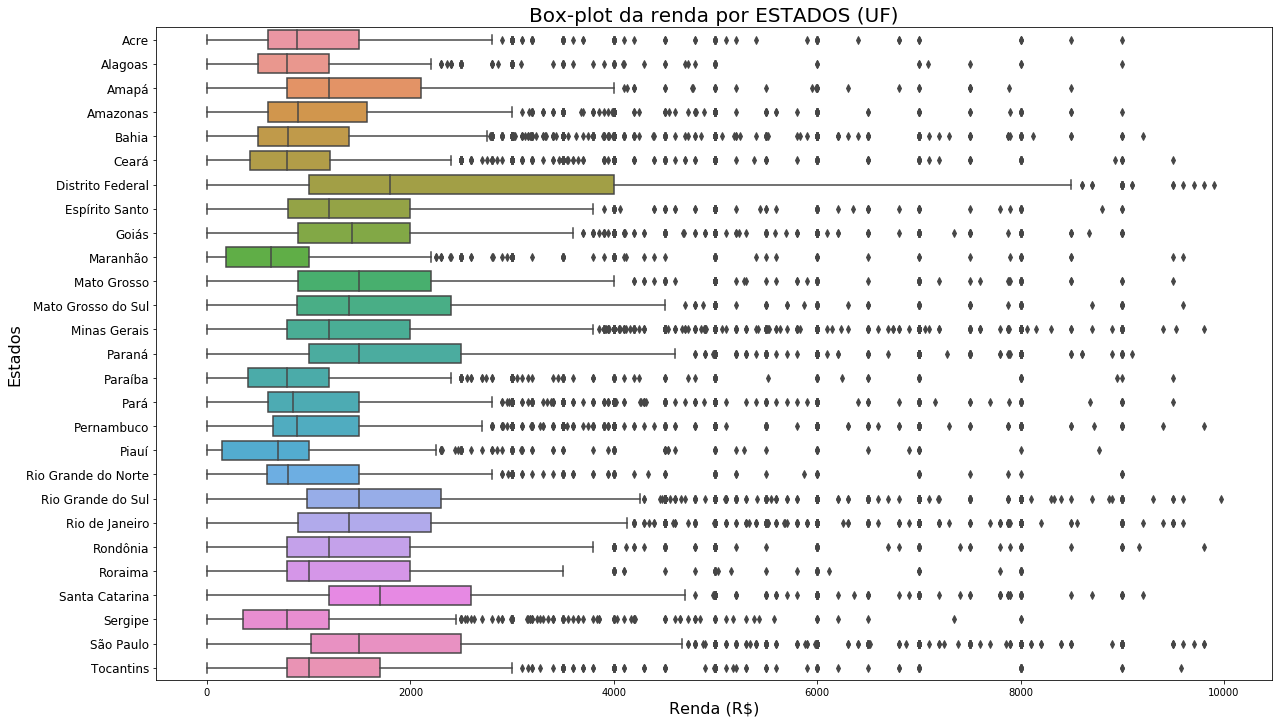

In [69]:
# Selecionando os dados
box_plot_renda_por_UF = sns.boxplot(
     x = 'Renda',
     y = 'UF',
     data = dados.query('Renda < 10000'), 
     orient = 'h',
     order = lista_codigos)

# Ajustando o tamanho da imagem
box_plot_renda_por_UF.figure.set_size_inches(20, 12)

# Definindo o título do gráfico
box_plot_renda_por_UF.set_title(
    'Box-plot da renda por ESTADOS (UF)',
     fontsize = 20)

# Configurando o eixo x
box_plot_renda_por_UF.set_xlabel('Renda (R$)', fontsize = 16)


# Configurando o eixo y
box_plot_renda_por_UF.set_ylabel('Estados', fontsize = 16, )
box_plot_renda_por_UF.set_yticklabels(
   nomes_uf_ordem_alfabetica,
   fontsize = 12)

# Plotar o gráfico
box_plot_renda_por_UF